# Interactive image visualization with napari
[napari](https://napari.org/) is a python-based image viewer. Today, we will use it by remote-controlling it from a jupyter notebook.

See also
* [napari tutorials](https://napari.org/tutorials/index.html)
* [Multi-dimensional image visualization in Python using napari [NEUBIAS Academy@Home] webinar](https://www.youtube.com/watch?v=VgvDSq5aCDQ)

For opening an image, we still use scikit-image:

In [1]:
import napari

from skimage.io import imread

image = imread('../../data/Haase_MRT_tfl3d1.tif')

# print out the spatial dimensions of the image
print(image.shape)

(192, 256, 256)


In [2]:
# Create an empty viewer
viewer = napari.Viewer()

In [3]:
# Add a new layer containing an image
viewer.add_image(image)

<Image layer 'image' at 0x1d5a7bb9af0>

With this command, we can make a screenshot of napari and save it in our notebook.

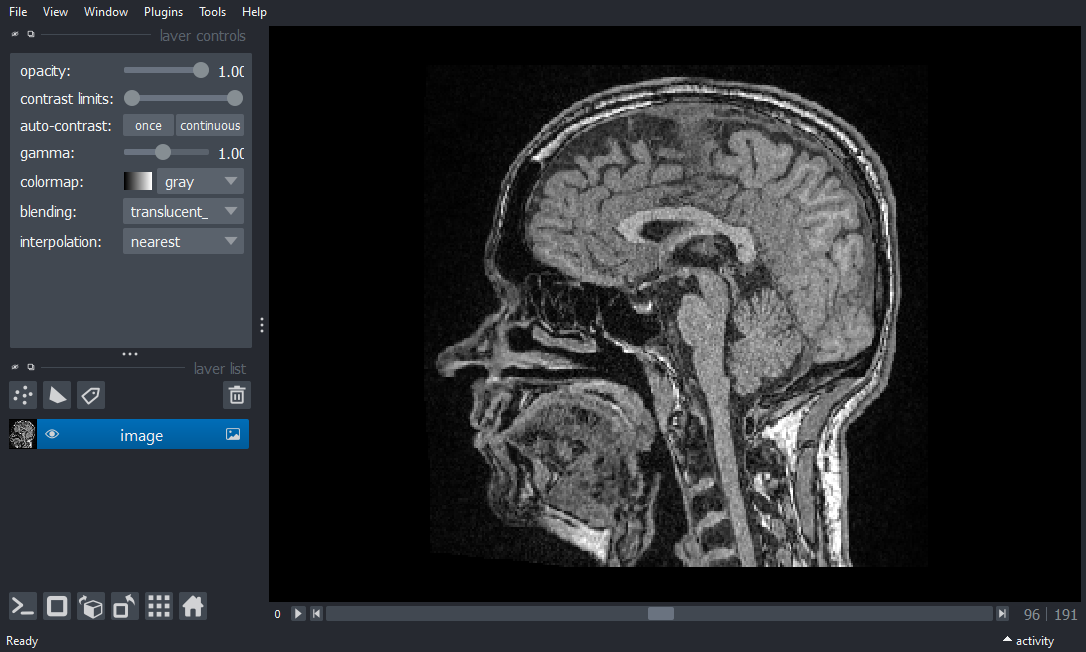

In [4]:
napari.utils.nbscreenshot(viewer)

## Slicing

We can programmatically move the Z-slice slider like this.

In [5]:
dims = viewer.dims.current_step
dims

(96, 128, 128)

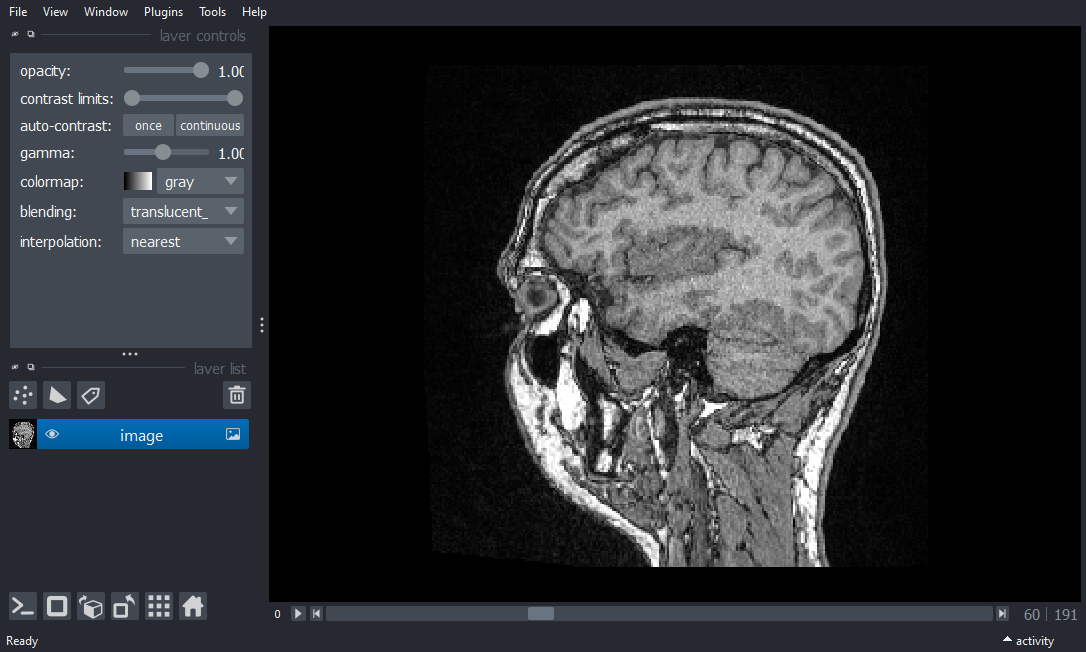

In [6]:
# modify Z-slice position
dims = list(dims)
dims[0] = 60
viewer.dims.current_step = dims

# take another screenshot
napari.utils.nbscreenshot(viewer)

## 3D rendering

We can also activate the 3D view programmatically.

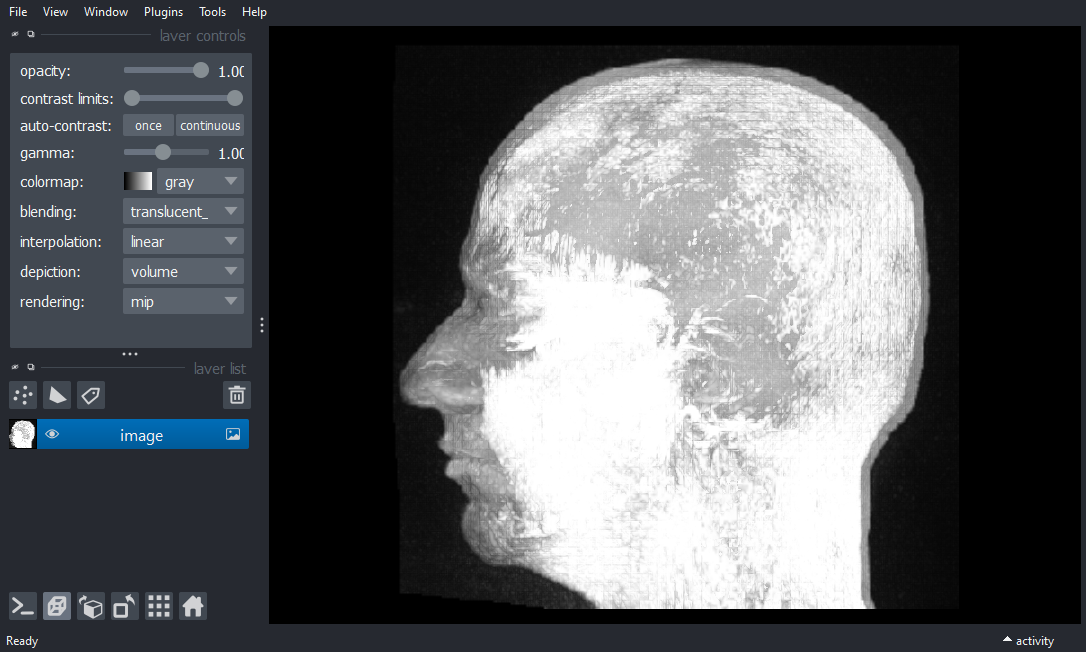

In [7]:
viewer.dims.ndisplay = 3

napari.utils.nbscreenshot(viewer)

## Camera orientation

For changing the camera position it is recommended to print out the camera, e.g. after a modification was done manually. This allows you to understand what `center`, `zoom`, `angles` etc mean. You can then modify these parameters using Python.

In [8]:
viewer.camera

Camera(center=(95.5, 127.5, 127.5), zoom=2.2191406249999996, angles=(0.0, 0.0, 90.00000000000001), perspective=0.0, interactive=True)

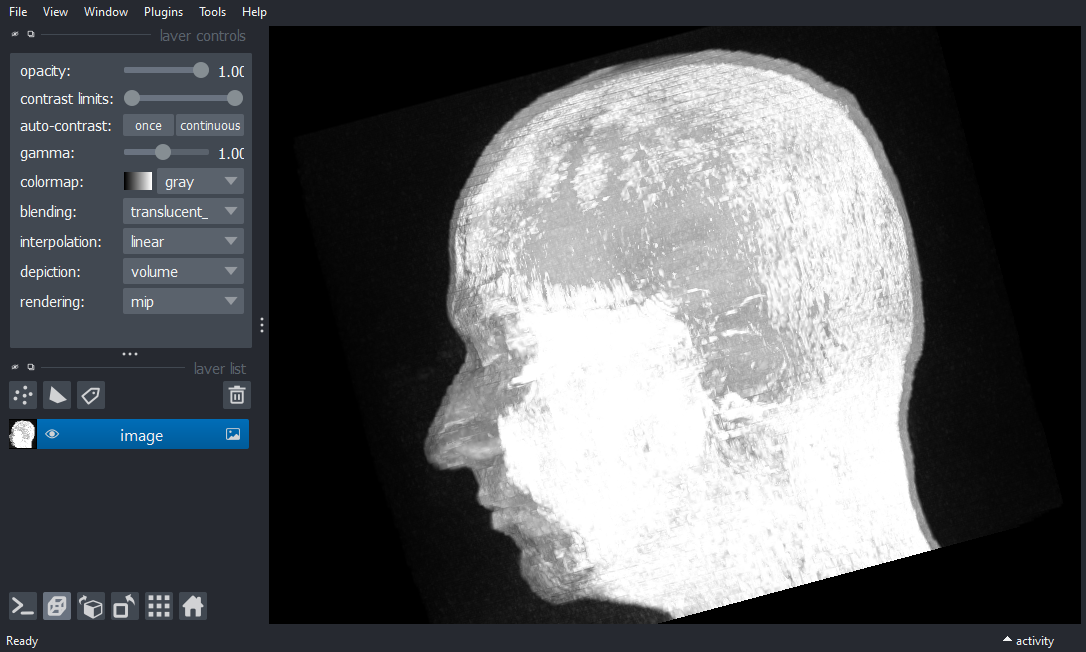

In [9]:
viewer.camera.angles = (15, -15, 90)

napari.utils.nbscreenshot(viewer)

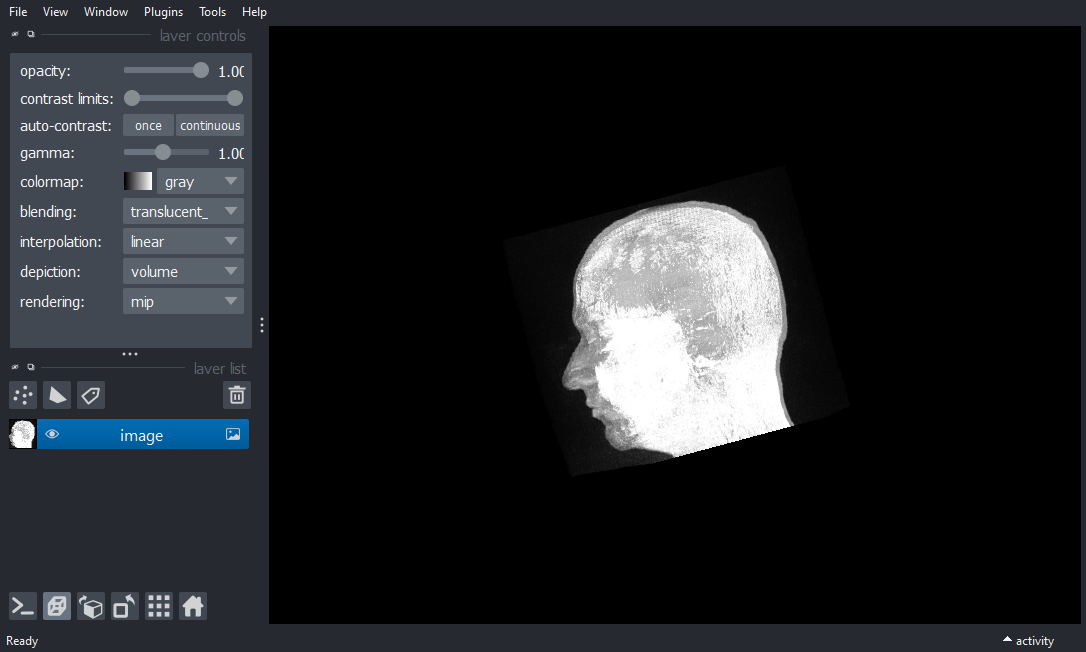

In [10]:
viewer.camera.zoom = 1

napari.utils.nbscreenshot(viewer)

In [11]:
viewer.dims.ndisplay = 2

dims[0] = 96
viewer.dims.current_step = dims

## Layer properties

For modifying colormaps / lookup tables and image display range, you can call commands like this.

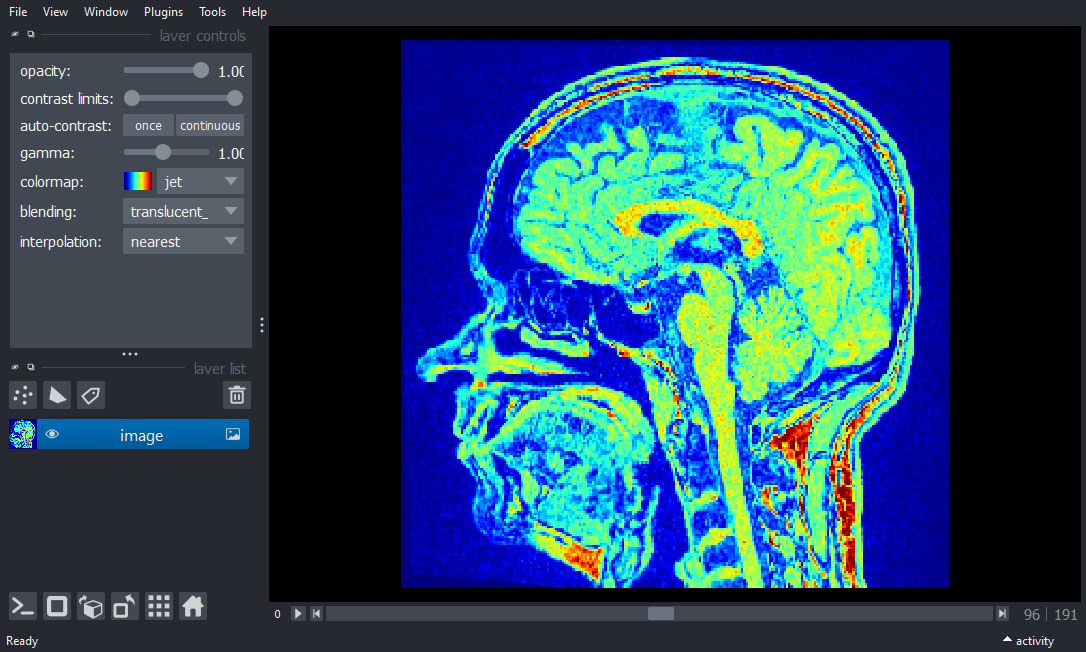

In [12]:
image_layer = viewer.layers[0]

image_layer.colormap = "jet"

napari.utils.nbscreenshot(viewer)

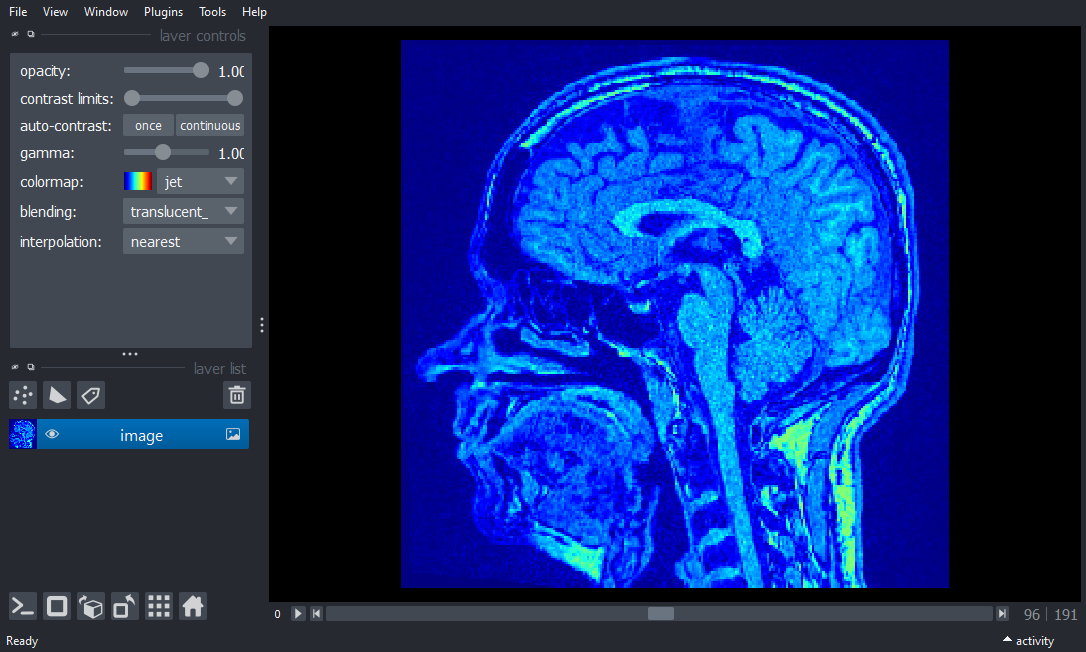

In [13]:
image_layer.contrast_limits = [0, 500]

napari.utils.nbscreenshot(viewer)

In [14]:
image_layer.colormap = 'gray'

## Visualizing segmentation results

Segmentation results are typically displayed as label images in Napari. In a label image intensities correspond to the object (class) a pixel belongs to. For example in a semantic segmentation, a pixel with intensity 1 belongs to category 1 and a pixel with intensity 2 belongs to category 2. When doing instance segmentation, a pixel with intensity 1 belongs to object 1. A pixel with intensity 2 belongs to object 2.

Label images can be put into Napari's layer list using the command `viewer.add_labels()`.

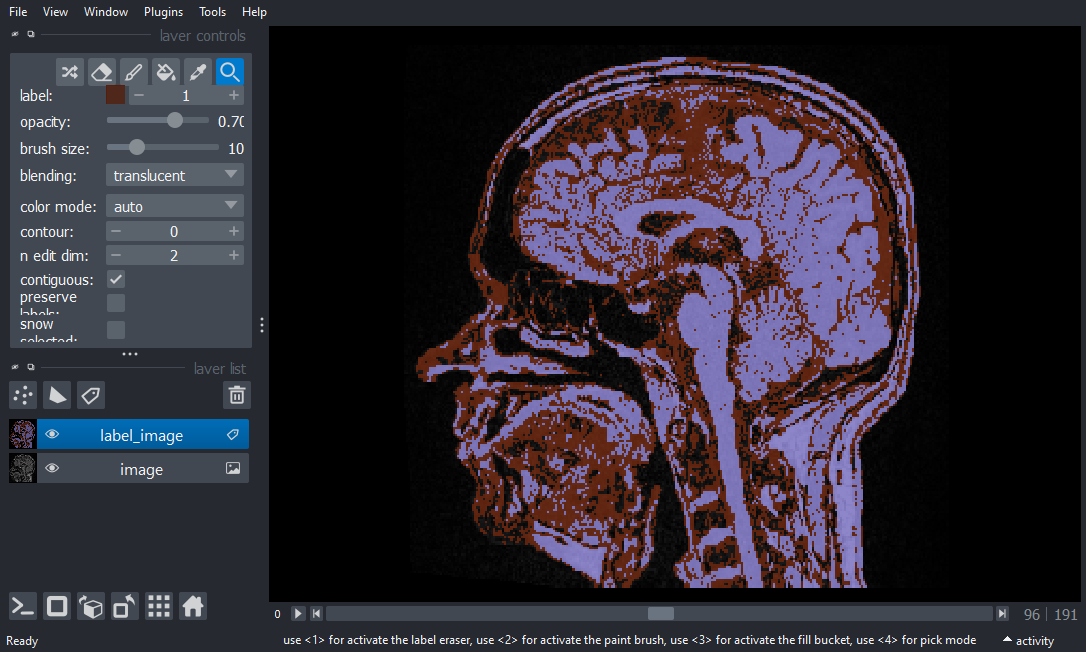

In [15]:
label_image = (image > 50) * 1 + (image > 110) * 2

labels_layer = viewer.add_labels(label_image)

napari.utils.nbscreenshot(viewer)

Also labels layers can be modified accordingly.

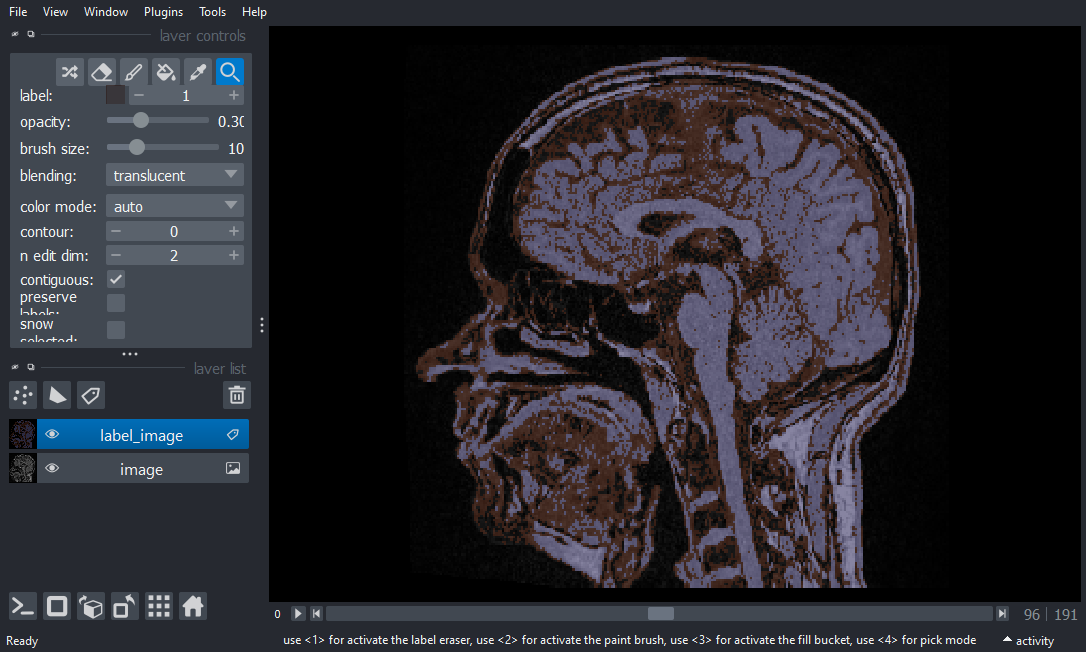

In [16]:
labels_layer.opacity = 0.3

napari.utils.nbscreenshot(viewer)

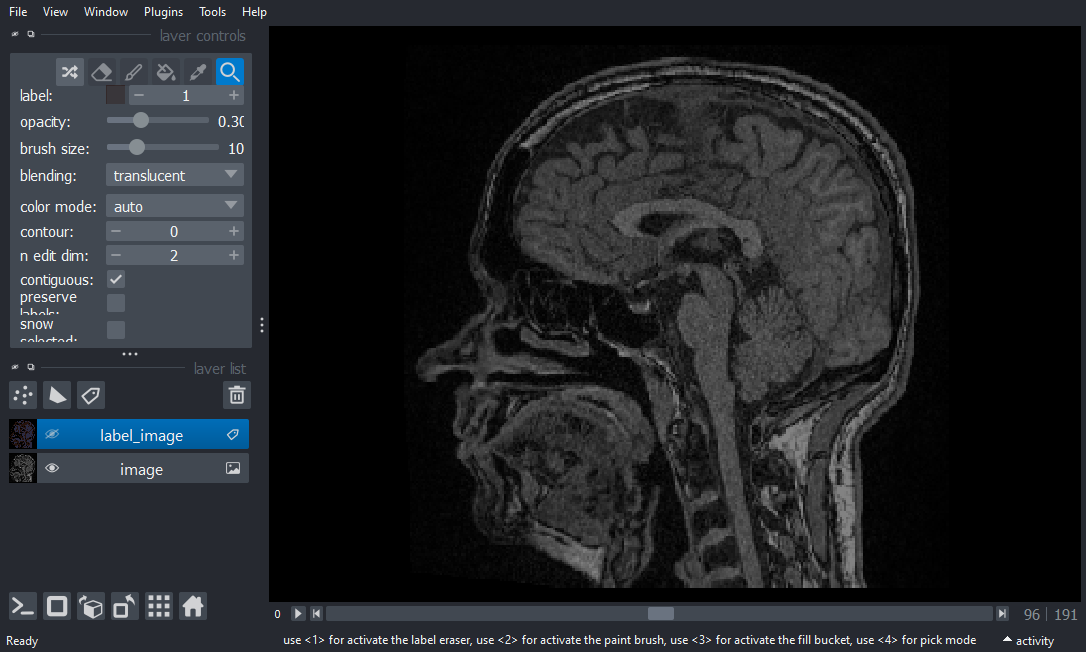

In [17]:
labels_layer.visible = False

napari.utils.nbscreenshot(viewer)

## Removing layers
Last but not least, we can also clean up and remove layers.

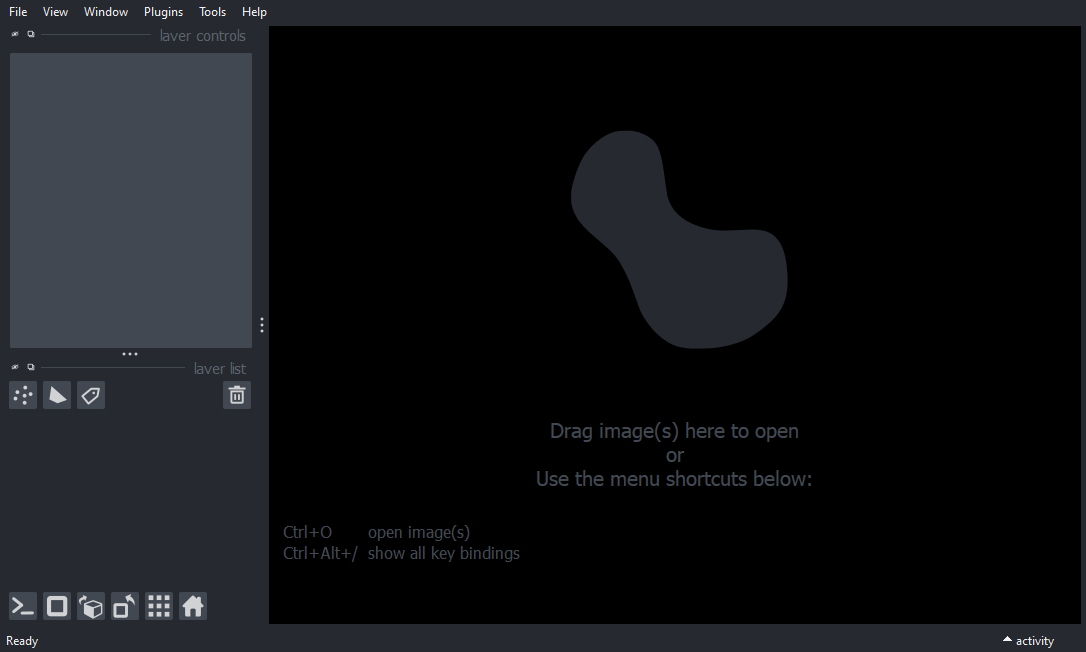

In [18]:
for l in list(viewer.layers):
    viewer.layers.remove(l)
    
napari.utils.nbscreenshot(viewer)

## Exercise
Start a new notebook, import napari, load the image `../data/hela-cells.tif` and add its three channels independently to napari as three layers. Afterwards, play with colormap and blending in the user interface. Can you make it look similar to ImageJ? Also check out the napari [image layer tutorial](https://napari.org/tutorials/fundamentals/image.html). Can you also program such a visualization?